# Explore here

In [22]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


databse = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

#visualize dataframe
databse.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
#dimensions
databse.shape


(48895, 16)

In [24]:
#obtener info de tipos de datos
databse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [25]:
# verificar duplicate
# databse.drop("id", axis = 1).duplicated().sum()
print(f"Número de ids duplicados {databse['id'].duplicated().sum()}")
print(f"Número de nombres duplicados {databse['name'].duplicated().sum()}")
print(f"Número de host ids duplicados {databse['host_id'].duplicated().sum()}")

# si tengo que eliminar duplicados, usaría lo siguiente
#databse.drop_duplicates("id", axis = 1)

Número de ids duplicados 0
Número de nombres duplicados 989
Número de host ids duplicados 11438


In [33]:
data_limpia = databse.drop([ "id" ,"name" , "host_name", "last_review", "reviews_per_month", "calculated_host_listings_count",], axis=1, inplace=False)
data_limpia.head()
#data_limpia.shape
# id, host name, umber reviews, last review, reviews per month, calculated host listing count

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


/tmp/ipykernel_88495/3374445737.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)


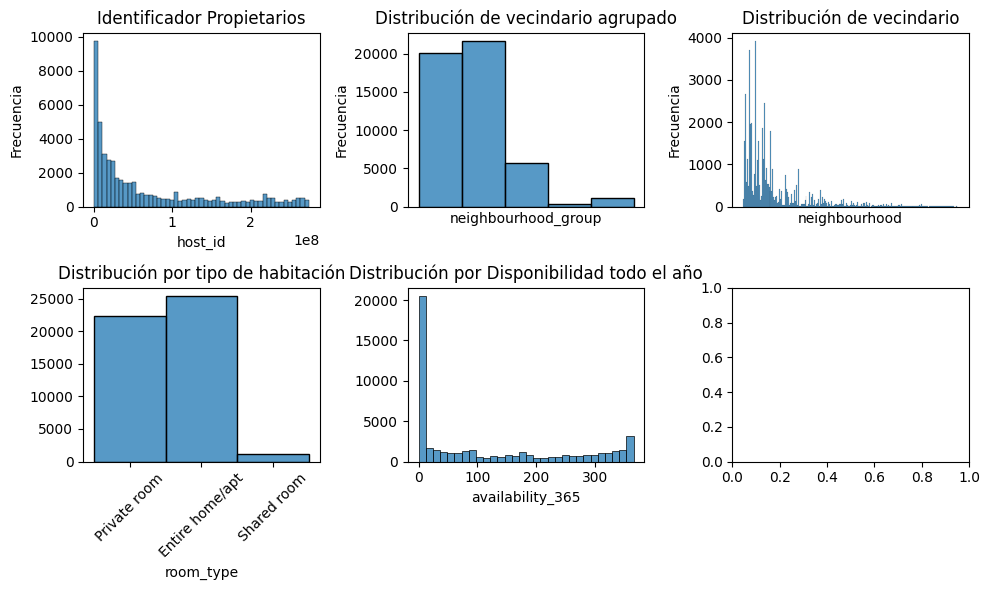

In [66]:
#Graficación variables categóricos
#host_id , neighbourhood_group , neighbourhood , room_type , availability_365

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 6))


# Create a multiple histogram
sns.histplot(ax = axis[0,0], data = data_limpia, x = "host_id")
axis[0,0].set_title("Identificador Propietarios") #Titulo grafico izq
axis[0,0].set_ylabel("Frecuencia") # label de y
#axis[0,0].grid(True) # cuadricula activada
#axis[0,0].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[0,1], data = data_limpia, x = "neighbourhood_group").set_xticks([])
axis[0,1].set_title("Distribución de vecindario agrupado") #Titulo grafico izq
axis[0,1].set_ylabel("Frecuencia") # label de y
#axis[0,1].grid(True) # cuadricula activada
#axis[0,1].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[0,2], data = data_limpia, x = "neighbourhood").set_xticks([])
axis[0,2].set_title("Distribución de vecindario") #Titulo grafico izq
axis[0,2].set_ylabel("Frecuencia") # label de y
#axis[0,2].grid(True) # cuadricula activada
#axis[0,2].grid(True, linestyle="--", linewidth=0.5, color="red") # cuadricula curiosa

sns.histplot(ax = axis[1,0], data = data_limpia, x = "room_type")
axis[1,0].set_title("Distribución por tipo de habitación")  # Título del segundo subplot
axis[1,0].set_ylabel(None)
axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)
#axis[1,0].grid(True)
#axis[1,0].grid(True, linestyle="--", linewidth=0.5, color="red")

sns.histplot(ax = axis[1,1], data = data_limpia, x = "availability_365")
axis[1,1].set_title("Distribución por Disponibilidad todo el año")  # Título del segundo subplot
axis[1,1].set_ylabel(None)
#axis[1,2].grid(True)
#axis[1,2].grid(True, linestyle="--", linewidth=0.5, color="red")


plt.tight_layout()
plt.show()



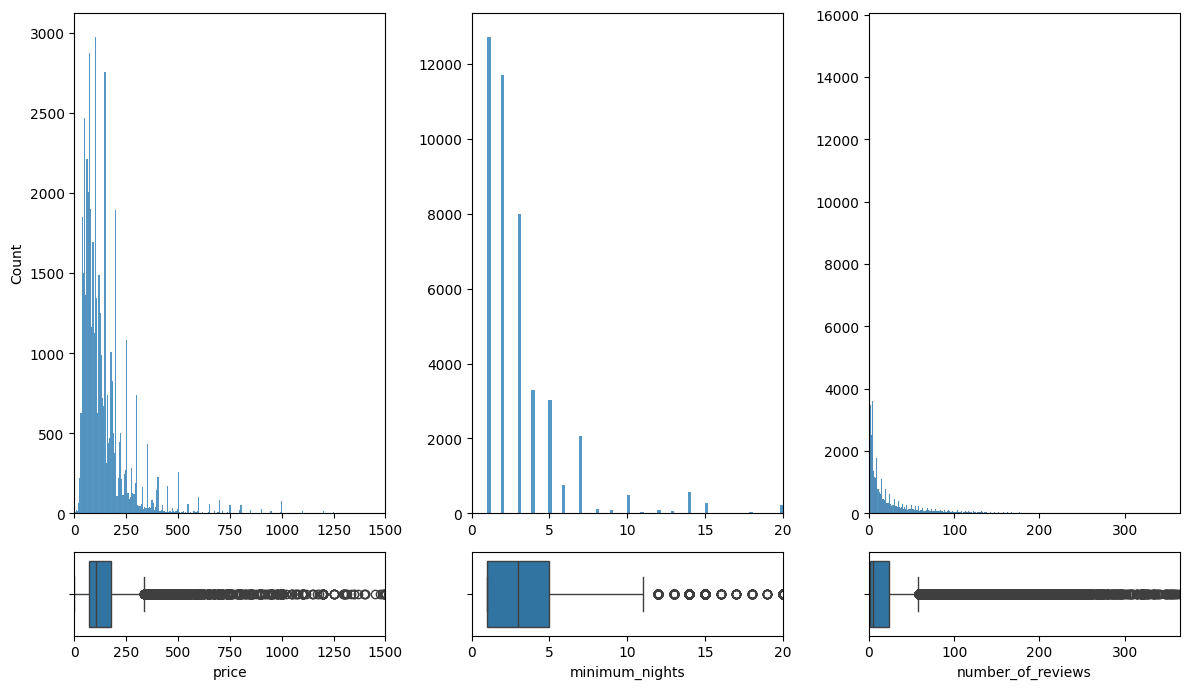

In [52]:
#Graficación variables Numéricos
# price , minimum_nights , number_of_reviews

fig, axis = plt.subplots(2,3 , figsize = (12, 7), gridspec_kw={"height_ratios":[6,1]})


# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_limpia, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpia, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpia, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpia, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = data_limpia, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data_limpia, x = "number_of_reviews")
axis[0, 0].set_xlim(0, 1500)
axis[1, 0].set_xlim(0, 1500)
axis[0, 1].set_xlim(0, 20)
axis[1, 1].set_xlim(0, 20)
axis[0, 2].set_xlim(0, 365)
axis[1, 2].set_xlim(0, 365)

# sns.histplot(ax = axis[1,1], data = data_limpia, x = "number_of_reviews")
# axis[1,1].set_title("Distribución por número de reviews")  # Título del segundo subplot
# axis[1,1].set_ylabel(None)
#axis[1,1].grid(True)
#axis[1,1].grid(True, linestyle="--", linewidth=0.5, color="red")

plt. tight_layout()
plt.show()

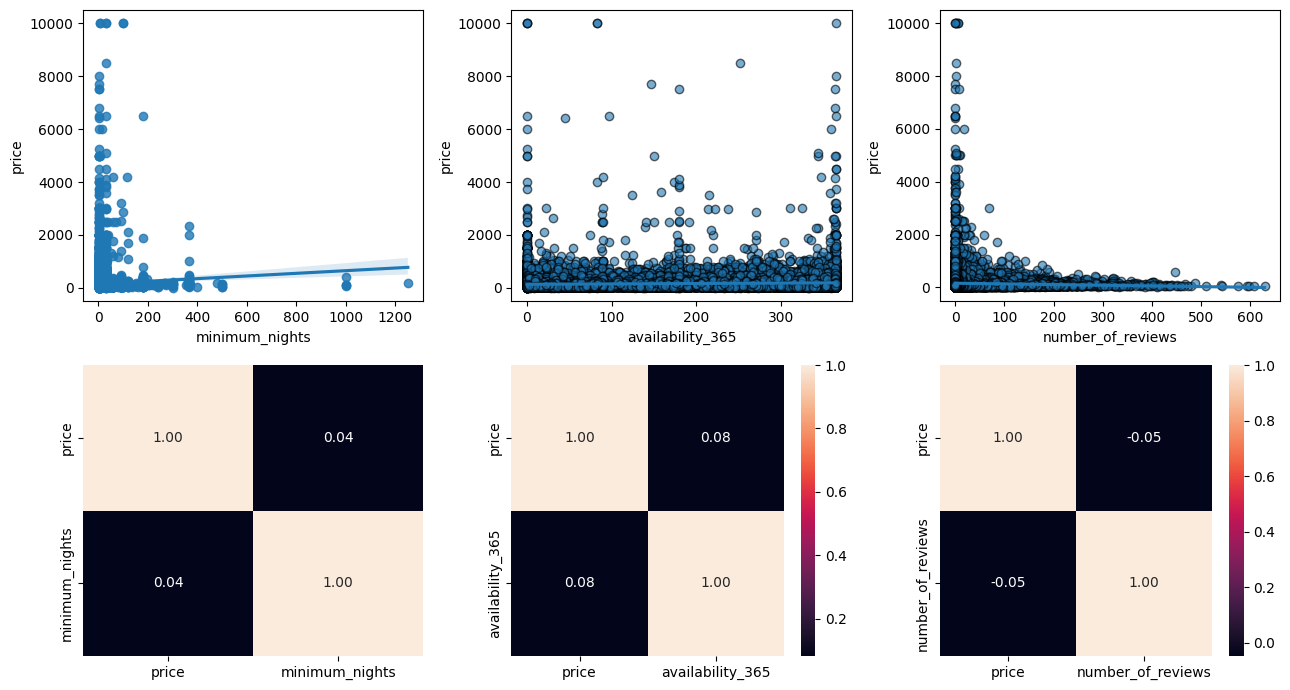

In [ ]:
# verificar correlación y afinidad de variables
# numérico a numérico

fig, axis = plt.subplots(2, 3, figsize = (13, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0,0], data = data_limpia, x = "minimum_nights", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data = data_limpia, x = "availability_365", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])

sns.regplot(ax = axis[0,2], data = data_limpia, x = "number_of_reviews", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

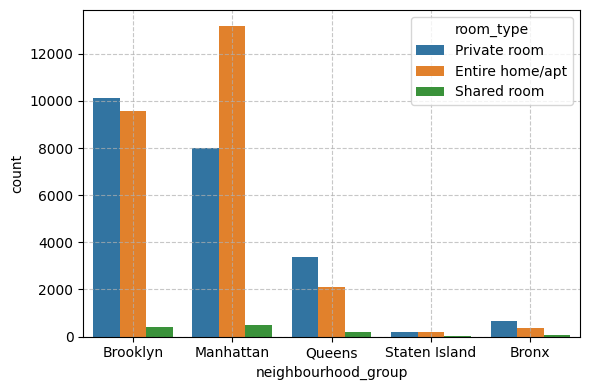

In [30]:
# verificar correlación y afinidad de variables
# categórico a categórico

plt.figure(figsize = (6, 4))
sns.countplot(data=data_limpia, x="neighbourhood_group", hue="room_type")
plt.grid(linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


Combinaciones de variables con varias predictoras



/tmp/ipykernel_88495/1586022385.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)


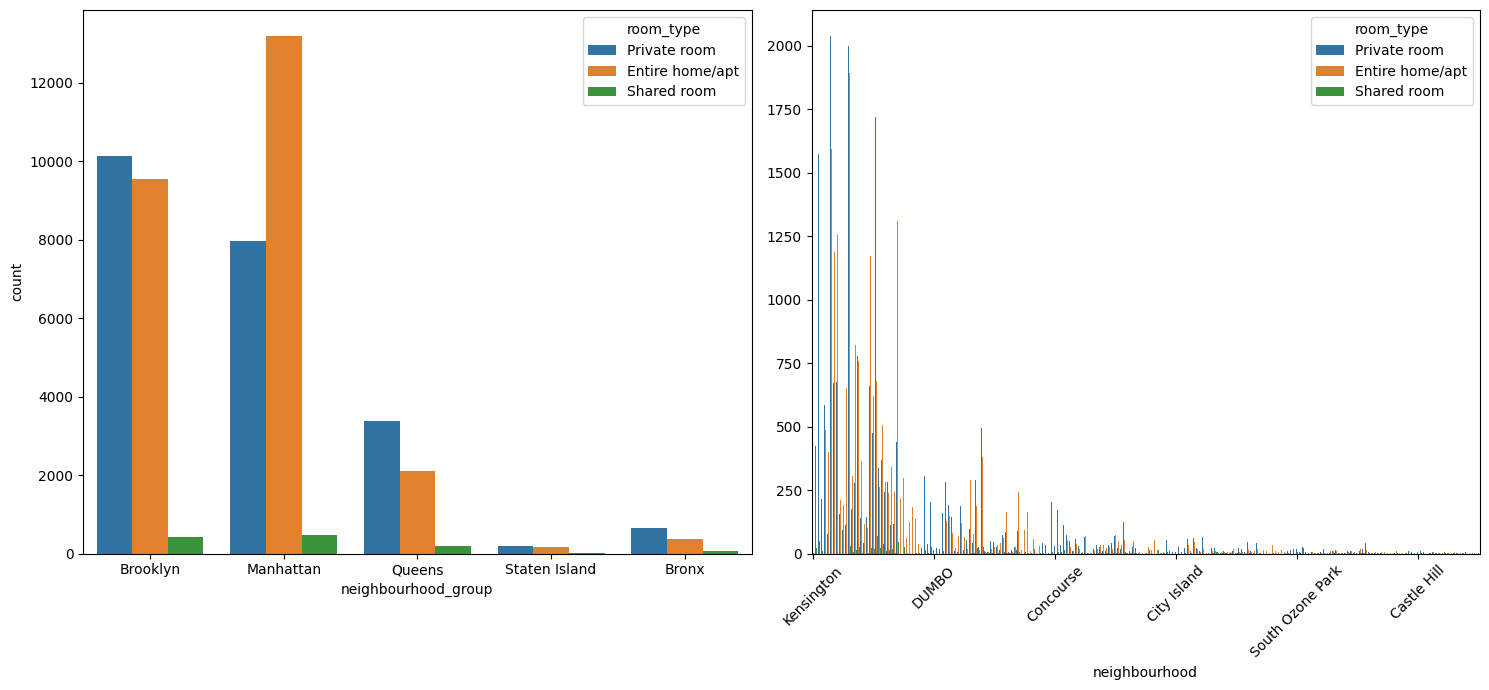

In [ ]:
from matplotlib.ticker import MaxNLocator

fig, axis = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = data_limpia, x = "neighbourhood", hue = "room_type").set(ylabel = None)
axis[1].xaxis.set_major_locator(MaxNLocator(nbins=6)) #limitar a 6 etiquetas
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_88495/1238293200.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X para legibilidad


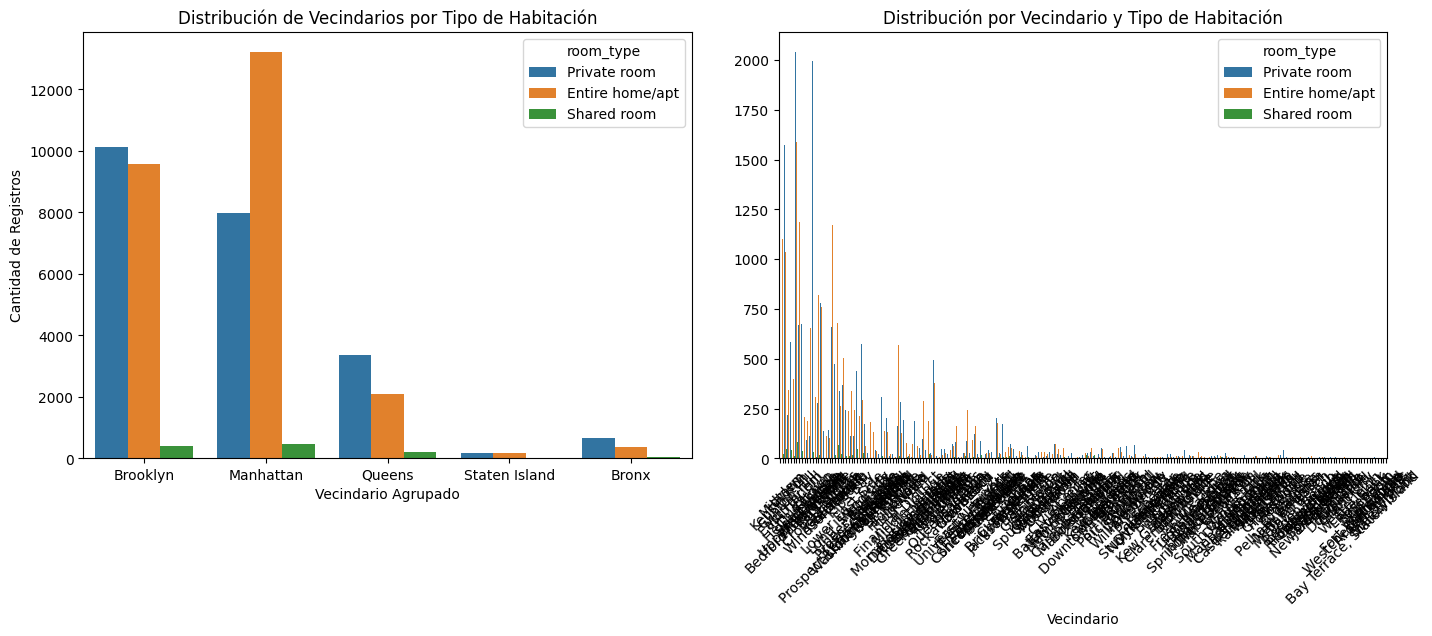

In [59]:
# Crear figura y subgráficas
fig, axis = plt.subplots(1, 2, figsize=(15, 7))

# Graficar el primer countplot
sns.countplot(ax=axis[0], data=data_limpia, x="neighbourhood_group", hue="room_type")
axis[0].set_title("Distribución de Vecindarios por Tipo de Habitación")  # Título para el primer gráfico
axis[0].set_xlabel("Vecindario Agrupado")  # Etiqueta del eje X
axis[0].set_ylabel("Cantidad de Registros")  # Etiqueta del eje Y

# Graficar el segundo countplot
sns.countplot(ax=axis[1], data=data_limpia, x="neighbourhood", hue="room_type")
axis[1].set_title("Distribución por Vecindario y Tipo de Habitación")  # Título para el segundo gráfico
axis[1].set_xlabel("Vecindario")  # Etiqueta del eje X
axis[1].set_ylabel(None)  # Eliminando la etiqueta del eje Y
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45)  # Rotar etiquetas del eje X para legibilidad

# Ajustar espaciado entre subgráficas para evitar solapamientos
plt.tight_layout(pad=3.0)

# Mostrar el gráfico
plt.show()
